In [1]:
import numpy as np

In [2]:

from matplotlib import pyplot as plt

In [3]:
A= 20256 % 8

In [4]:
A

0

In [5]:
image_size = 28

In [6]:

intType = np.dtype( 'int32' ).newbyteorder( '>' )
nMetaDataBytes = 4 * intType.itemsize

In [7]:
def loadMNIST( prefix ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile(  prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile( prefix + '-labels.idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

trainingImages, trainingLabels = loadMNIST( "train" )

In [8]:
np.shape(trainingImages)

(60000, 28, 28)

In [9]:
len(trainingLabels)

60000

In [10]:
trainingLabels[0]

5

In [11]:

import numpy as np


In [12]:

data = trainingImages.reshape(60000, image_size*image_size)

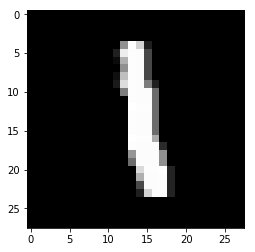

In [13]:

img1_2d = np.reshape(data[6,:], (28, 28))
# show it
plt.imshow(img1_2d, cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
datalabel = trainingLabels.reshape(len(trainingLabels))

In [16]:
trainlabel=[]
for i in range(len(datalabel)):
    if datalabel[i] == 9:
        trainlabel.append(i)

In [17]:
np.shape(datalabel)

(60000,)

In [18]:
traindata=np.array([])

In [19]:
for i in range(60000):
    if datalabel[i] == 9:
        traindata=np.append(traindata, data[i,:])

In [20]:
np.shape(traindata)

(4664016,)

In [21]:
traindata=traindata.reshape(len(trainlabel),image_size*image_size)

In [22]:
mean = np.array([])

In [23]:
for i in range(image_size*image_size):
    mean=np.append(mean,[np.mean(traindata[:,i])])

In [24]:
mean=mean.reshape(image_size*image_size,1)

In [25]:
##different method for variance(up to multiplication)

variance = np.zeros((image_size*image_size,image_size*image_size))
for i in range(len(trainlabel)):
    variance += (traindata[i,:].reshape(image_size*image_size,1) - mean).dot((traindata[i,:].reshape(image_size*image_size,1) - mean).T)

In [26]:
variance= 1/60000*variance

In [27]:
eigval, eigvec = np.linalg.eig(variance)


In [28]:
np.shape(eigvec)

(784, 784)

In [29]:
eigval[0]

(39986.40576927838+0j)

In [30]:
eigval[0]

(39986.40576927838+0j)

In [31]:
eig_pairs = [(np.abs(eigval[i]), eigvec[:,i]) for i in range(len(eigval))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)



In [32]:
x=np.linspace(0,784,784)
y=eigval.tolist()

z =[]
a=[eig_pairs[i][0] for i in range(image_size*image_size)]
b= sum([eig_pairs[i][0] for i in range(image_size*image_size)])
    

In [33]:

for i in range(image_size*image_size):
    z.append(sum(a[0:i]))

D:\anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


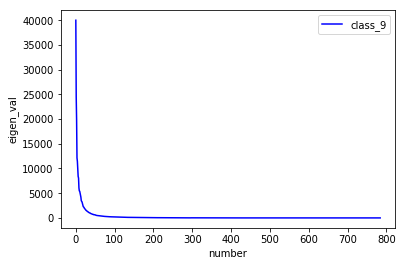

In [34]:

plt.plot(x, y , color='blue',label='class_9')
plt.xlabel('number')
plt.ylabel('eigen_val')
plt.legend()

plt.show()


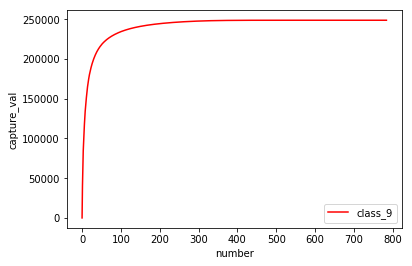

In [35]:

plt.plot(x, z , color='red',label='class_9')
plt.xlabel('number')
plt.ylabel('capture_val')
plt.legend()

plt.show()

$\Large projection\ to\ 2\ dimensional\ space.$

In [36]:
W_j = np.hstack((eig_pairs[0][1].reshape(image_size*image_size,1), eig_pairs[1][1].reshape(image_size*image_size,1)))

In [37]:
W_j[:,1]

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+

In [38]:
eig_pairs[1][1]

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+

In [39]:
data_tranformed_j_9= W_j.T.dot(traindata.T)

In [40]:
np.shape(data_tranformed_j_9.T)

(5949, 2)

In [41]:
data_tranformed_j_9

array([[328.30853498+0.j, 842.48380327+0.j, 624.18677955+0.j, ...,
        754.6899828 +0.j, 629.76326346+0.j, 592.87195826+0.j],
       [269.78823348+0.j, 470.15112869+0.j, 643.29210626+0.j, ...,
        794.55679107+0.j, 670.94273596+0.j, 618.15102624+0.j]])

Class_7

In [42]:
trainlabel1=[]
for i in range(len(datalabel)):
    if datalabel[i] == 7:
        trainlabel1.append(i)

In [43]:
traindata1=np.array([])

In [44]:
for i in range(60000):
    if datalabel[i] == 7 :
        traindata1=np.append(traindata1, data[i,:])

In [45]:
traindata1=traindata1.reshape(len(trainlabel1),image_size*image_size)

In [46]:
mean1 = np.array([])

In [47]:
for i in range(image_size*image_size):
    mean1=np.append(mean1,[np.mean(traindata1[:,i])])

In [48]:
mean1=mean1.reshape(image_size*image_size,1)

In [49]:
##different method for variance(up to multiplication)

variance1 = np.zeros((image_size*image_size,image_size*image_size))
for i in range(len(trainlabel1)):
    variance1 += (traindata1[i,:].reshape(image_size*image_size,1) - mean1).dot((traindata1[i,:].reshape(image_size*image_size,1) - mean1).T)

In [50]:
variance1=1/60000*variance1

In [51]:
eigval1, eigvec1 = np.linalg.eig(variance1)


In [52]:
eigval1[0]

(40915.973681179865+0j)

In [53]:
eig_pairs1 = [(np.abs(eigval1[i]), eigvec1[:,i]) for i in range(len(eigval1))]

eig_pairs1.sort(key=lambda x: x[0], reverse=True)



In [54]:
x=np.linspace(0,784,784)
y1=eigval1.tolist()

z1 =[]
a1=[eig_pairs1[i][0] for i in range(image_size*image_size)]
b1= sum([eig_pairs1[i][0] for i in range(image_size*image_size)])
    

In [55]:

for i in range(image_size*image_size):
    z1.append(sum(a1[0:i]))

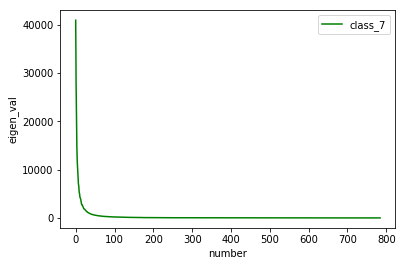

In [56]:

plt.plot(x, y1 , color='green',label='class_7')
plt.xlabel('number')
plt.ylabel('eigen_val')
plt.legend()

plt.show()


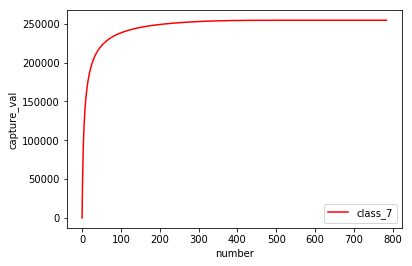

In [57]:

plt.plot(x, z1 , color='red',label='class_7')
plt.xlabel('number')
plt.ylabel('capture_val')
plt.legend()

plt.show()

In [58]:
W_j_7 = np.hstack((eig_pairs1[0][1].reshape(image_size*image_size,1), eig_pairs1[1][1].reshape(image_size*image_size,1)))

In [60]:
data_tranformed_j_7= W_j_7.T.dot(traindata1.T)

In [61]:
data_tranformed_j_7

array([[ 648.28714801+0.j,  390.15892896+0.j, -138.56955908+0.j, ...,
         774.1737905 +0.j,  774.30679971+0.j,  286.12831641+0.j],
       [1469.68654623+0.j,  601.90971465+0.j, -239.76944925+0.j, ...,
        1003.46019056+0.j,  390.96173396+0.j, 1411.31403153+0.j]])

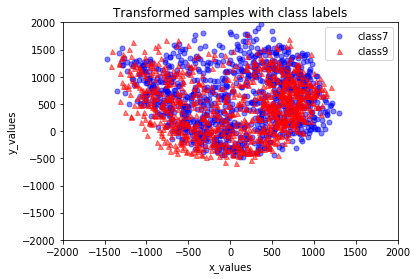

In [73]:
plt.plot(data_tranformed_j_7[0,0:1000], data_tranformed_j_7[1,0:1000], 'o', markersize=5, color='blue', alpha=0.5, label='class7')
plt.plot(data_tranformed_j_9[0,0:1000], data_tranformed_j_9[1,0:1000], '^', markersize=5, color='red', alpha=0.5, label='class9')
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

Using PCA, we can't classify digit 7 and digit 9.


So we need other tecniques.
In short, one use PCA only for datacompressing for an analysis.